# Linear Regression Models to determine if ICU Utilization can be estimated based on Hospital Occupancy and Vaccination Status

## Objectives

This project aims to build linear regression models to estimate ICU utilization based on hospital occupancy and vaccination status. The expectation of the conclusions to be found in the data is that a higher rate of unvaccinated people in hospitals will correspond well to a higher rate of people requiring intensive care. This expectation is drawn from the rationale that inoculated patients will have a stronger resistance to the virus and, therefore, will be less likely to need ICU admission.

In [2]:
# linear algebra:
import numpy as np
# data processing, CSV file I/O (e.g. pd.read_csv):
import pandas as pd
# data visualization:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# regression analysis:
import statsmodels.formula.api as sm
# visual inspection of the regression models:
from statsmodels.graphics.regressionplots import plot_regress_exog, plot_fit, plot_leverage_resid2, influence_plot
from statsmodels.tools.eval_measures import rmse
import scipy
import warnings
warnings.filterwarnings("ignore")

## Data Source

The dataset used in the project can be obtained from the **Ontario Data Catalogue**, https://data.ontario.ca/dataset/covid-19-vaccine-data-in-ontario/resource/274b819c-5d69-4539-a4db-f2950794138c. The database contains data denoting the number of individuals admitted to the ICU on the cause of COVID-19 by vaccination status and the number of hospitalized individuals due to COVID-19 (excluding ICU) by vaccination status. The dataset spans the months of August 2021 to November 2021.

## Data Loading and Initial Exploration

In [5]:
df = pd.read_csv("../data/vac_status_hosp_icu_raw.csv")

In [6]:
df.head()

,date,icu_unvac,icu_partial_vac,icu_full_vac,hospitalnonicu_unvac,hospitalnonicu_partial_vac,hospitalnonicu_full_vac
0,2021-08-10,22,3,0,23,4,11
1,2021-08-11,37,5,2,34,7,8
2,2021-08-12,45,5,2,44,7,9
3,2021-08-13,52,5,3,65,6,8
4,2021-08-14,53,4,1,67,6,11


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   date                        108 non-null    object
 1   icu_unvac                   108 non-null    int64 
 2   icu_partial_vac             108 non-null    int64 
 3   icu_full_vac                108 non-null    int64 
 4   hospitalnonicu_unvac        108 non-null    int64 
 5   hospitalnonicu_partial_vac  108 non-null    int64 
 6   hospitalnonicu_full_vac     108 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 6.0+ KB


In [8]:
df["icu_total"] = df.icu_unvac + df.icu_partial_vac + df.icu_full_vac
df["icu_hospitalnonicu_unvac_total"] = df.icu_unvac + df.hospitalnonicu_unvac

In [9]:
df.head()

,date,icu_unvac,icu_partial_vac,icu_full_vac,hospitalnonicu_unvac,hospitalnonicu_partial_vac,hospitalnonicu_full_vac,icu_total,icu_hospitalnonicu_unvac_total
0,2021-08-10,22,3,0,23,4,11,25,45
1,2021-08-11,37,5,2,34,7,8,44,71
2,2021-08-12,45,5,2,44,7,9,52,89
3,2021-08-13,52,5,3,65,6,8,60,117
4,2021-08-14,53,4,1,67,6,11,58,120


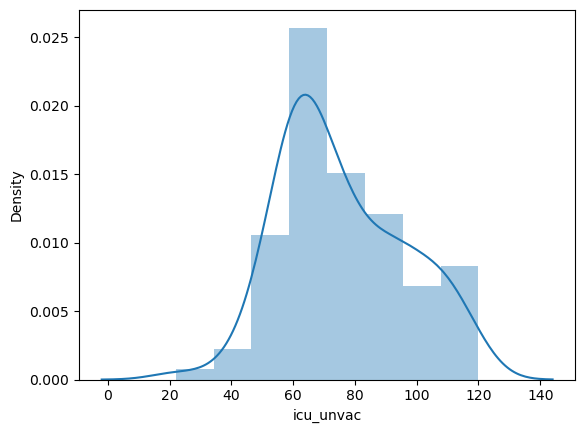

In [10]:
sns.distplot(df["icu_unvac"]);

In [11]:
df["icu_unvac"].mean()

75.83333333333333

In [12]:
df["icu_unvac"].median()

72.0

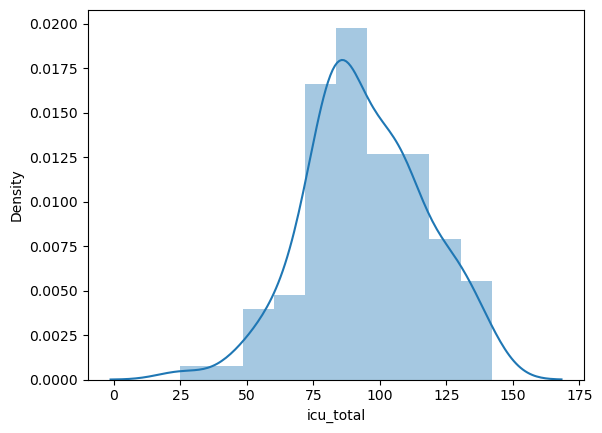

In [13]:
sns.distplot(df["icu_total"]);

In [14]:
df["icu_total"].mean()

94.56481481481481

In [15]:
df["icu_total"].median()

91.5

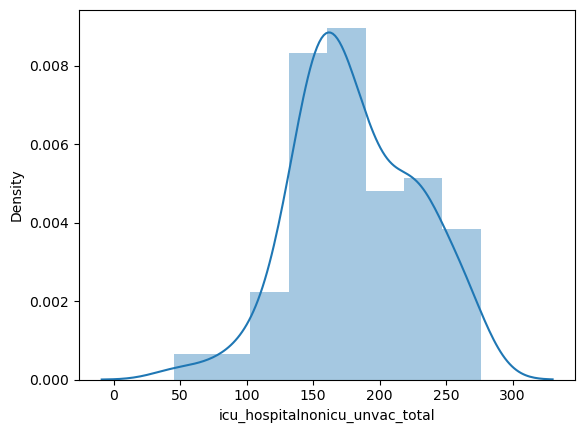

In [16]:
sns.distplot(df["icu_hospitalnonicu_unvac_total"]);

In [17]:
df["icu_hospitalnonicu_unvac_total"].mean()

181.96296296296296

In [18]:
df["icu_hospitalnonicu_unvac_total"].median()

177.0

## Predicting how many unvaccinated individuals need ICU knowing the total number of unvaccinated hospitalized COVID-19 patients

In [20]:
df1 = df.copy()

In [21]:
df1.head()

,date,icu_unvac,icu_partial_vac,icu_full_vac,hospitalnonicu_unvac,hospitalnonicu_partial_vac,hospitalnonicu_full_vac,icu_total,icu_hospitalnonicu_unvac_total
0,2021-08-10,22,3,0,23,4,11,25,45
1,2021-08-11,37,5,2,34,7,8,44,71
2,2021-08-12,45,5,2,44,7,9,52,89
3,2021-08-13,52,5,3,65,6,8,60,117
4,2021-08-14,53,4,1,67,6,11,58,120


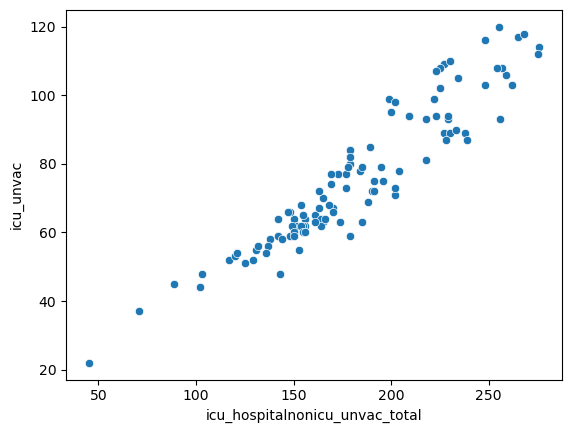

In [22]:
sns.scatterplot(data = df1, x = "icu_hospitalnonicu_unvac_total", y = "icu_unvac");

The data show a linear trend.

In [24]:
m_df1 = sm.ols('icu_unvac ~ icu_hospitalnonicu_unvac_total', data = df1).fit()
m_df1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              icu_unvac   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     807.2
Date:                Sat, 23 Nov 2024   Prob (F-statistic):           2.21e-51
Time:                        23:00:38   Log-Likelihood:                -362.14
No. Observations:                 108   AIC:                             728.3
Df Residuals:                     106   BIC:                             733.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -0.1839      2.759     -0.067      0.947      -5.653       5.285
icu_hospitalnonicu_unvac_total     0.4178      0.015     28.412      0.000       0.389       0.447
==============================================================================
Omnibus:                        0.511   Durbin-Watson:                   0.437
Prob(Omnibus):                  0.775   Jarque-Bera (JB):                0.641
Skew:                           0.143   Prob(JB):                        0.726
Kurtosis:                       2.754   Cond. No.                         770.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We have estimated the intercept to be approximately **-0.1839** *(the intercept of the regression line - that is, the predicted value when x = 0)* and the slope to be approximately **0.4178** *(the slope of the regression line represents the rate of change in y as x changes)*:
$$\text{y} = -0.1839 + 0.4178 \cdot \text{x}$$

- **R-squared**: *R-squared is the coefficient of determination that tells us that how much percentage variation independent variable can be explained by independent variable. The maximum possible value of R-squared can be 1, means the larger the R-squared value better the regression.* Here, **88.4 %** variation in unvaccinated individuals in ICU can be explained by hospitalized people (unvaccinated, including ICU).
- **Adj. R-squared**: *Compared to R-squared which can only increase, Adjusted R-squared has the capability to decrease with the addition of less significant variables, thus resulting in a more reliable and accurate evaluation.* Here, **88.3 %** variation in unvaccinated individuals in ICU can be explained by hospitalized people (unvaccinated, including ICU).

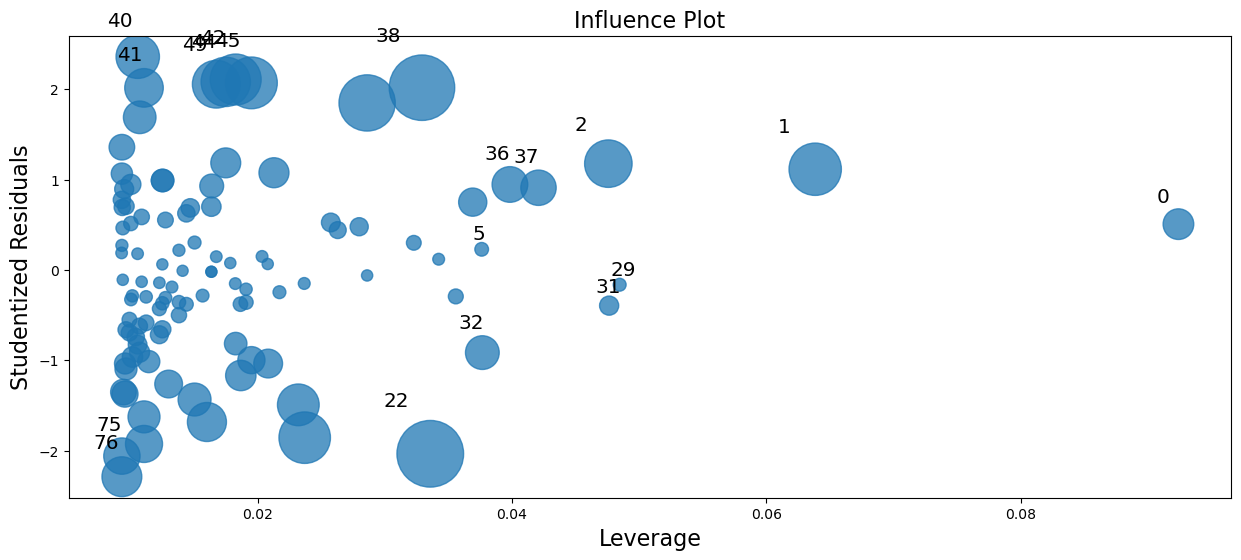

In [27]:
fig, ax = plt.subplots(figsize = (15, 6))
fig = influence_plot(m_df1, ax = ax)

There are outliers/leverages.

In [29]:
df1_no_outliers = df1.drop([0, 1, 2])

In [30]:
m_df1_no_outliers = sm.ols('icu_unvac ~ icu_hospitalnonicu_unvac_total', data = df1_no_outliers).fit()
m_df1_no_outliers.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              icu_unvac   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     699.5
Date:                Sat, 23 Nov 2024   Prob (F-statistic):           1.01e-47
Time:                        23:00:39   Log-Likelihood:                -351.91
No. Observations:                 105   AIC:                             707.8
Df Residuals:                     103   BIC:                             713.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -2.4730      3.081     -0.803      0.424      -8.584       3.638
icu_hospitalnonicu_unvac_total     0.4291      0.016     26.449      0.000       0.397       0.461
==============================================================================
Omnibus:                        0.294   Durbin-Watson:                   0.451
Prob(Omnibus):                  0.863   Jarque-Bera (JB):                0.450
Skew:                           0.097   Prob(JB):                        0.798
Kurtosis:                       2.744   Cond. No.                         860.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We have estimated the intercept to be approximately **-2.4730** and the slope to be approximately **0.4291**:
$$\text{y} = -2.4730 + 0.4291 \cdot \text{x}$$

- **R-squared**: **87.2 %** (with outliers/leverages: **88.4 %**) variation in unvaccinated individuals in ICU can be explained by hospitalized people (unvaccinated, including ICU).
- **Adj. R-squared**: **87.0 %** (with outliers/leverages: **88.3 %**) variation in unvaccinated individuals in ICU can be explained by hospitalized people (unvaccinated, including ICU).

- I - **with outliers/leverages**:
coef = 0.4178; std err = 0.015; t = 28.412; P>|t| = 0.000; interval [0.025 0.975] = 0.389 0.447
- II - **without outliers/leverages**:
coef = 0.4291; std err = 0.016; t = 26.449; P>|t| = 0.000; interval [0.025 0.975] = 0.397 0.461

In the second case, the coefficient is slightly larger; correspondingly, the 95% interval for the coefficient is a bit shifted. However, the 95% interval mostly overlaps; as a result, we may assume that the change in coefficient value is statistically insignificant.

- H0: the difference in coef. values is zero
- HA: the difference in coef. values is non-zero

In [36]:
obs_diff_df1 = 0.4291 - 0.4178
se_df1 = np.sqrt(np.power(0.016, 2) + np.power(0.015, 2))

In [37]:
# p-value:
(1 - scipy.stats.norm.cdf(obs_diff_df1 / se_df1)) * 2

0.6063883596470938

**p-value** is **0.6064** - thus, we cannot reject the null hypothesis; the change in coefficient value is insignificant and we do **not** need to remove the outliers from the dataset.

Conditions, such as **linearity**, **nearly normal residuals**, and **constant variability**, for the least squares line, are met; for your reference, *please see details below*.

In [40]:
intercept_df1, slope_df1 = m_df1.params
df1["icu_unvac_est"] = intercept_df1 + slope_df1 * df1.icu_hospitalnonicu_unvac_total

In [41]:
df1.head()

,date,icu_unvac,icu_partial_vac,icu_full_vac,hospitalnonicu_unvac,hospitalnonicu_partial_vac,hospitalnonicu_full_vac,icu_total,icu_hospitalnonicu_unvac_total,icu_unvac_est
0,2021-08-10,22,3,0,23,4,11,25,45,18.615413
1,2021-08-11,37,5,2,34,7,8,44,71,29.477225
2,2021-08-12,45,5,2,44,7,9,52,89,36.996941
3,2021-08-13,52,5,3,65,6,8,60,117,48.694276
4,2021-08-14,53,4,1,67,6,11,58,120,49.947562


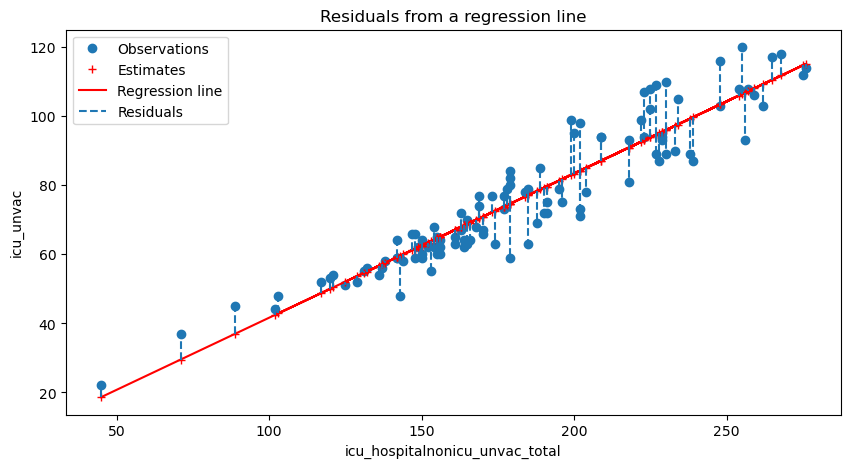

In [42]:
fig = plt.figure(figsize = (10, 5))
plt.plot(df1.icu_hospitalnonicu_unvac_total, df1.icu_unvac, "o", label = "Observations")
plt.plot(df1.icu_hospitalnonicu_unvac_total, df1.icu_unvac_est, "r+", label = "Estimates")
plt.plot(df1.icu_hospitalnonicu_unvac_total, df1.icu_unvac_est, "r-", label = "Regression line")
plt.vlines(df1.icu_hospitalnonicu_unvac_total, df1.icu_unvac_est, df1.icu_unvac, linestyles = "dashed", label = "Residuals")
plt.title("Residuals from a regression line")
plt.xlabel("icu_hospitalnonicu_unvac_total")
plt.ylabel("icu_unvac")
plt.legend();

The regression line goes approximately through the center of the cloud of points: roughly one-half of the points lie above the regression line and another half lie below.

count    1.080000e+02
mean     1.779646e-14
std      6.950525e+00
min     -1.559552e+01
25%     -4.579090e+00
50%     -5.905468e-01
75%      4.785208e+00
max      1.604924e+01
Name: icu_unvac_res, dtype: float64

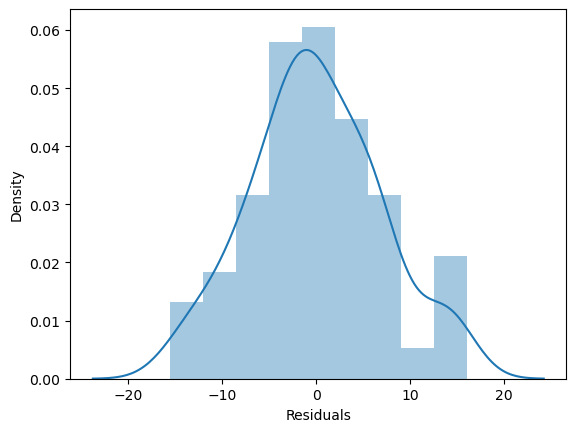

In [44]:
df1["icu_unvac_res"] = df1["icu_unvac"] - df1["icu_unvac_est"]
sns.distplot(df1.icu_unvac_res)
plt.xlabel("Residuals");
df1["icu_unvac_res"].describe()

The residuals are nearly normal.

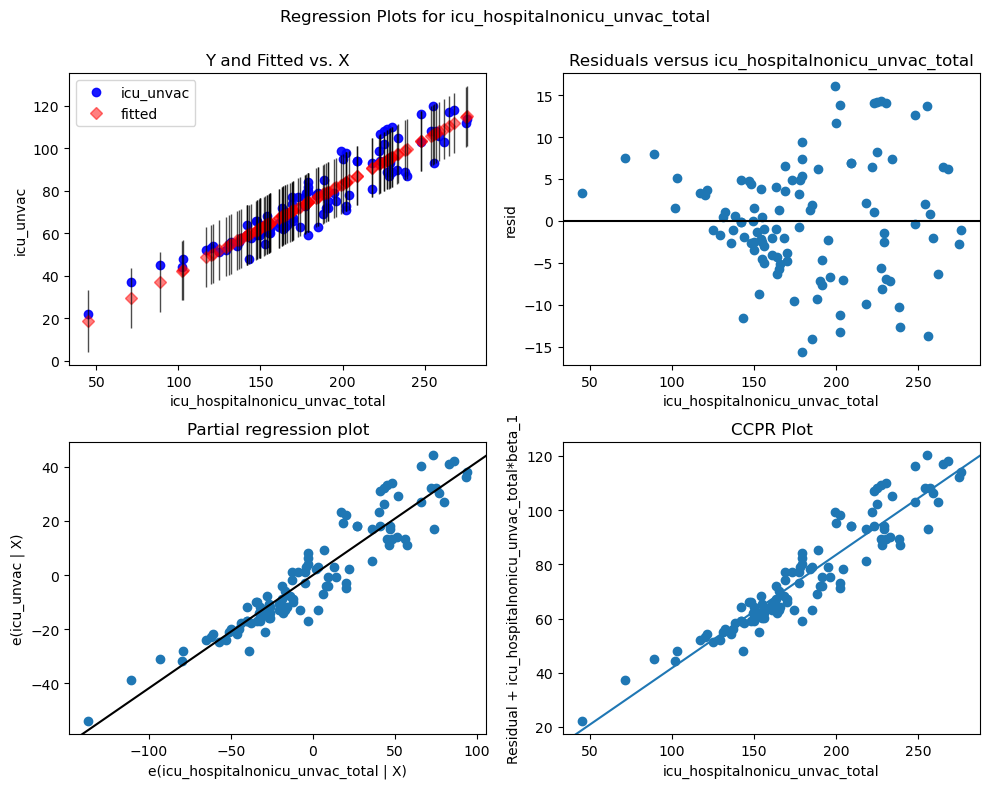

In [46]:
fig = plt.figure(figsize = (10, 8))
fig = plot_regress_exog(m_df1, "icu_hospitalnonicu_unvac_total", fig = fig)

The variability of points around the least squares line remains roughly constant.

In [48]:
icu_unvac_rmse = rmse(df1.icu_unvac_est, df1.icu_unvac)
print("RMSE = %f" % icu_unvac_rmse)

RMSE = 6.918272


In [49]:
icu_unvac_nrmse = icu_unvac_rmse / df1.icu_unvac.mean()
print("NRMSE = %f" % icu_unvac_nrmse)

NRMSE = 0.091230


The obtained RMSE is approximately 7 patients; thus, our predictions, on average, are off by 7 patients (it is about 9.1% of the average number of unvaccinated individuals needed ICU in our dataset).

## Predicting how many unvaccinated + partially + fully vaccinated individuals need ICU knowing the total number of unvaccinated hospitalized COVID-19 patients

In [52]:
df2 = df.copy()

In [53]:
df2.head()

,date,icu_unvac,icu_partial_vac,icu_full_vac,hospitalnonicu_unvac,hospitalnonicu_partial_vac,hospitalnonicu_full_vac,icu_total,icu_hospitalnonicu_unvac_total
0,2021-08-10,22,3,0,23,4,11,25,45
1,2021-08-11,37,5,2,34,7,8,44,71
2,2021-08-12,45,5,2,44,7,9,52,89
3,2021-08-13,52,5,3,65,6,8,60,117
4,2021-08-14,53,4,1,67,6,11,58,120


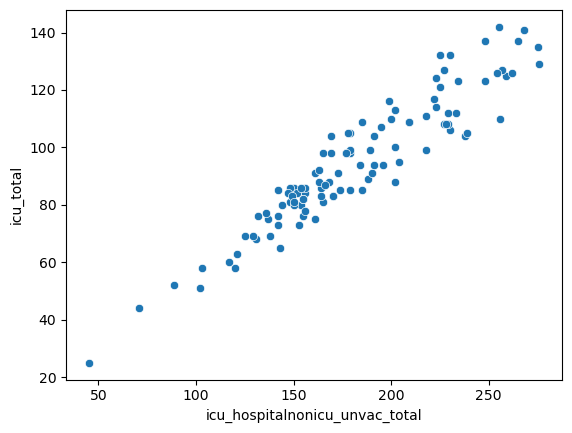

In [54]:
sns.scatterplot(data = df2, x = "icu_hospitalnonicu_unvac_total", y = "icu_total");

The data show a linear trend.

In [56]:
m_df2 = sm.ols('icu_total ~ icu_hospitalnonicu_unvac_total', data = df2).fit()
m_df2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              icu_total   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     820.5
Date:                Sat, 23 Nov 2024   Prob (F-statistic):           1.03e-51
Time:                        23:00:39   Log-Likelihood:                -371.00
No. Observations:                 108   AIC:                             746.0
Df Residuals:                     106   BIC:                             751.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         11.3695      2.995      3.797      0.000       5.432      17.307
icu_hospitalnonicu_unvac_total     0.4572      0.016     28.645      0.000       0.426       0.489
==============================================================================
Omnibus:                        0.360   Durbin-Watson:                   0.638
Prob(Omnibus):                  0.835   Jarque-Bera (JB):                0.526
Skew:                           0.051   Prob(JB):                        0.769
Kurtosis:                       2.674   Cond. No.                         770.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We have estimated the intercept to be approximately **11.3695** and the slope to be approximately **0.4572**:
$$\text{y} = 11.3695 + 0.4572 \cdot \text{x}$$

- **R-squared**: **88.6 %** variation in unvaccinated + partially + fully vaccinated individuals in ICU can be explained by hospitalized people (unvaccinated, including ICU).
- **Adj. R-squared**: **88.5 %** variation in unvaccinated + partially + fully vaccinated individuals in ICU can be explained by hospitalized people (unvaccinated, including ICU).

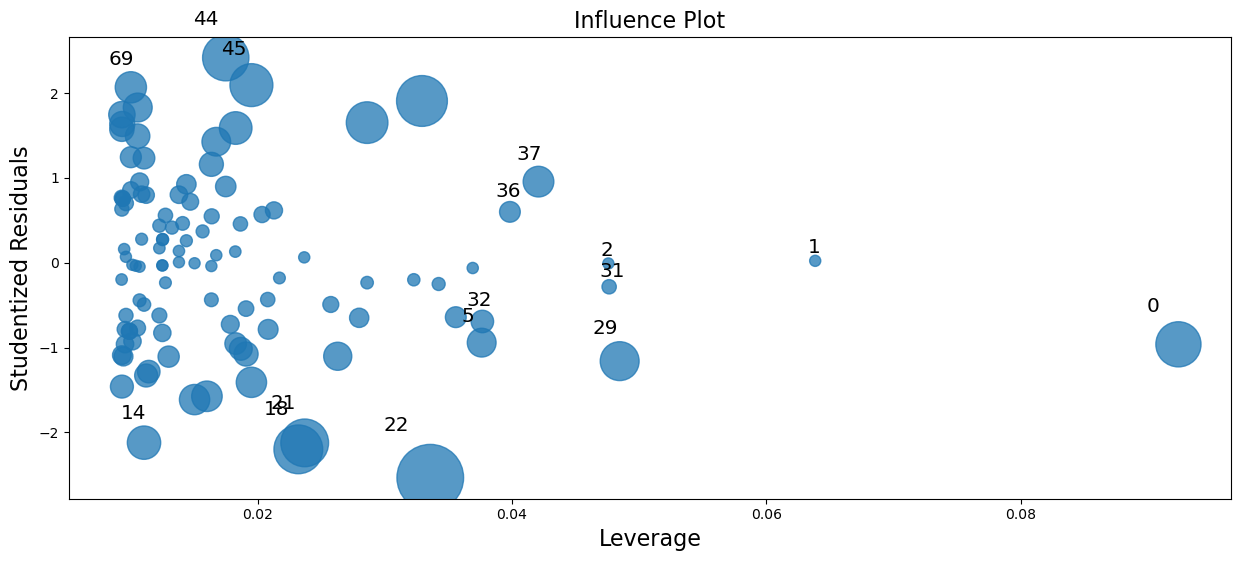

In [59]:
fig, ax = plt.subplots(figsize = (15, 6))
fig = influence_plot(m_df2, ax = ax)

There are outliers/leverages.

In [61]:
df2_no_outliers = df2.drop([0, 1, 2])

In [62]:
m_df2_no_outliers = sm.ols('icu_total ~ icu_hospitalnonicu_unvac_total', data = df2_no_outliers).fit()
m_df2_no_outliers.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              icu_total   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     643.9
Date:                Sat, 23 Nov 2024   Prob (F-statistic):           4.11e-46
Time:                        23:00:40   Log-Likelihood:                -361.71
No. Observations:                 105   AIC:                             727.4
Df Residuals:                     103   BIC:                             732.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         12.3973      3.383      3.665      0.000       5.689      19.106
icu_hospitalnonicu_unvac_total     0.4520      0.018     25.376      0.000       0.417       0.487
==============================================================================
Omnibus:                        0.573   Durbin-Watson:                   0.628
Prob(Omnibus):                  0.751   Jarque-Bera (JB):                0.699
Skew:                           0.069   Prob(JB):                        0.705
Kurtosis:                       2.625   Cond. No.                         860.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We have estimated the intercept to be approximately **12.3346** and the slope to be approximately **0.4523**:
$$\text{y} = 12.3346 + 0.4523 \cdot \text{x}$$

- **R-squared**: **86.8 %** (with outliers/leverages: **88.6 %**) variation in unvaccinated + partially + fully vaccinated individuals in ICU can be explained by hospitalized people (unvaccinated, including ICU).
- **Adj. R-squared**: **86.7 %** (with outliers/leverages: **88.5 %**) variation in unvaccinated + partially + fully vaccinated individuals in ICU can be explained by hospitalized people (unvaccinated, including ICU).

- I - **with outliers/leverages**:
coef = 0.4572; std err = 0.016; t = 28.645; P>|t| = 0.000; interval [0.025 0.975] = 0.426 0.489
- II - **without outliers/leverages**:
coef = 0.4523; std err = 0.017; t = 26.141; P>|t| = 0.000; interval [0.025 0.975] = 0.418 0.487

In the second case, the coefficient is slightly smaller; correspondingly, the 95% interval for the coefficient is a bit shifted. However, the 95% interval mostly overlaps; as a result, we may assume that the change in coefficient value is statistically insignificant.

- H0: the difference in coef. values is zero
- HA: the difference in coef. values is non-zero

In [68]:
obs_diff_df2 = 0.4572 - 0.4523
se_df2 = np.sqrt(np.power(0.016, 2) + np.power(0.017, 2))

In [69]:
# p-value:
(1 - scipy.stats.norm.cdf(obs_diff_df2 / se_df2)) * 2

0.8337512332907435

**p-value** is **0.8338** - thus, we cannot reject the null hypothesis; the change in coefficient value is insignificant and we do **not** need to remove the outliers from the dataset.

Conditions, such as **linearity**, **nearly normal residuals**, and **constant variability**, for the least squares line, are met; for your reference, *please see details below*.

In [72]:
intercept_df2, slope_df2 = m_df2.params
df2["icu_total_est"] = intercept_df2 + slope_df2 * df2.icu_hospitalnonicu_unvac_total

In [73]:
df2.head()

,date,icu_unvac,icu_partial_vac,icu_full_vac,hospitalnonicu_unvac,hospitalnonicu_partial_vac,hospitalnonicu_full_vac,icu_total,icu_hospitalnonicu_unvac_total,icu_total_est
0,2021-08-10,22,3,0,23,4,11,25,45,31.943955
1,2021-08-11,37,5,2,34,7,8,44,71,43.831419
2,2021-08-12,45,5,2,44,7,9,52,89,52.061202
3,2021-08-13,52,5,3,65,6,8,60,117,64.863087
4,2021-08-14,53,4,1,67,6,11,58,120,66.234718


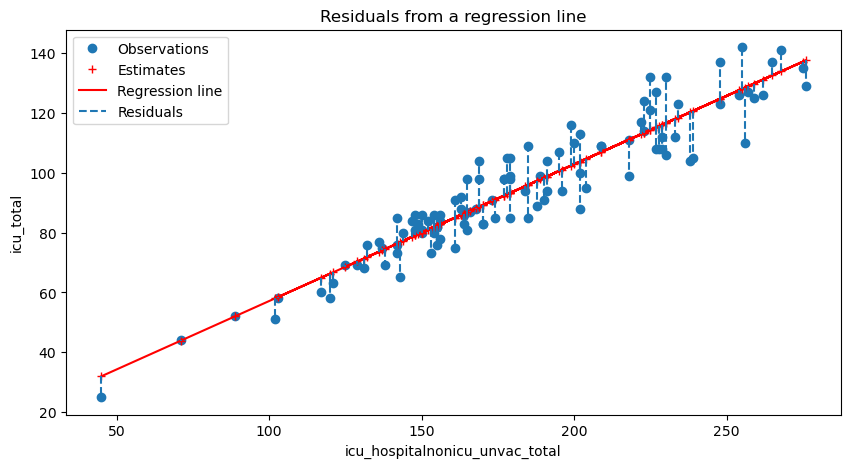

In [74]:
fig = plt.figure(figsize = (10, 5))
plt.plot(df2.icu_hospitalnonicu_unvac_total, df2.icu_total, "o", label = "Observations")
plt.plot(df2.icu_hospitalnonicu_unvac_total, df2.icu_total_est, "r+", label = "Estimates")
plt.plot(df2.icu_hospitalnonicu_unvac_total, df2.icu_total_est, "r-", label = "Regression line")
plt.vlines(df2.icu_hospitalnonicu_unvac_total, df2.icu_total_est, df2.icu_total, linestyles = "dashed", label = "Residuals")
plt.title("Residuals from a regression line")
plt.xlabel("icu_hospitalnonicu_unvac_total")
plt.ylabel("icu_total")
plt.legend();

The regression line goes approximately through the center of the cloud of points: roughly one-half of the points lie above the regression line and another half lie below.

count    1.080000e+02
mean    -8.552829e-16
std      7.545040e+00
min     -1.841530e+01
25%     -5.831749e+00
50%     -1.210042e-01
75%      5.332672e+00
max      1.775821e+01
Name: icu_total_res, dtype: float64

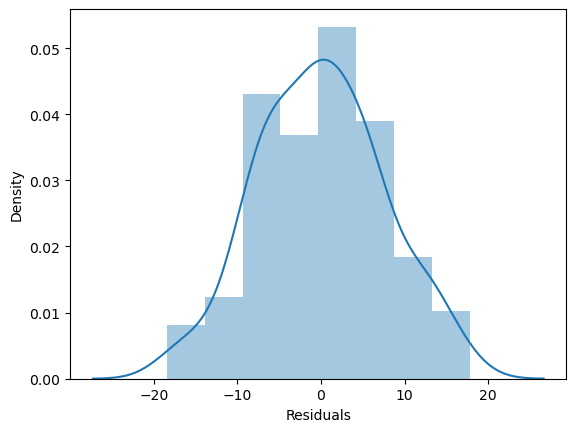

In [76]:
df2["icu_total_res"] = df2["icu_total"] - df2["icu_total_est"]
sns.distplot(df2.icu_total_res)
plt.xlabel("Residuals");
df2["icu_total_res"].describe()

The residuals are nearly normal.

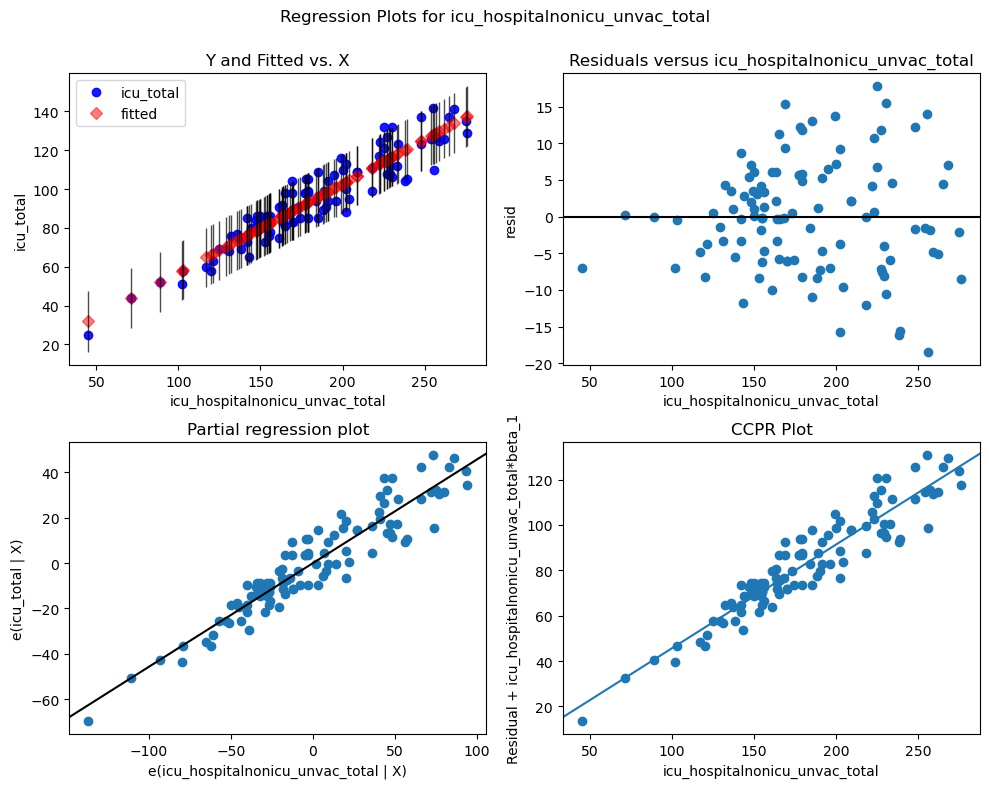

In [78]:
fig = plt.figure(figsize = (10, 8))
fig = plot_regress_exog(m_df2, "icu_hospitalnonicu_unvac_total", fig = fig)

The variability of points around the least squares line remains roughly constant.

In [80]:
icu_total_rmse = rmse(df2.icu_total_est, df2.icu_total)
print("RMSE = %f" % icu_total_rmse)

RMSE = 7.510028


In [81]:
icu_total_nrmse = icu_total_rmse / df2.icu_total.mean()
print("NRMSE = %f" % icu_total_nrmse)

NRMSE = 0.079417


The obtained RMSE is approximately 8 patients; thus, our predictions, on average, are off by 8 patients (it is about 7.9% of the average number of unvaccinated + partially + fully vaccinated individuals needed ICU in our dataset).

## Conclusions

1. The initial model's R-squared and Adj. R-squared values of 0.884 and 0.883 indicate that it is a suitable predictive model for estimating the number of unvaccinated individuals requiring ICU based on the total number of unvaccinated COVID-19 patients in the hospital.
2. For the first model, the average predictions are off by seven patients (approximately 9.1% of the average number of unvaccinated individuals needed ICU in the dataset).
3. The second initial model's R-squared and Adj. R-squared values of 0.886 and 0.885 indicate that it is an acceptable predictive model to estimate how many unvaccinated + partially + fully vaccinated individuals need ICU, knowing the total number of unvaccinated hospitalized COVID-19 patients.
4. For the second model, the predictions, on average, are off by eight patients (approximately 7.9% of the average number of unvaccinated + partially + fully vaccinated individuals needed ICU in the dataset).
5. A few outliers are far from the cloud for both models. However, they fall close to the least squares line and do not appear very influential. Removing outliers from the dataset does not result in a better data fit.